**Machine Learning for Smart Health Systems**</br>
Instructor: Juber Rahman</br>
**Omdena School**</br>
Course Link: https://omdena.com/course/machine-learning-for-smart-health-systems/</br>
Updated: Nov 6, 2021

# Part-1 : Supervised Classification

In [2]:
# import the general modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Last project

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/tmp_dl_dir'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
       

/content/tmp_dl_dir/104.hea
/content/tmp_dl_dir/107.atr
/content/tmp_dl_dir/201.dat
/content/tmp_dl_dir/233.dat
/content/tmp_dl_dir/201.atr
/content/tmp_dl_dir/108.hea
/content/tmp_dl_dir/114.hea
/content/tmp_dl_dir/233.atr
/content/tmp_dl_dir/207.hea
/content/tmp_dl_dir/234.atr
/content/tmp_dl_dir/214.atr
/content/tmp_dl_dir/212.hea
/content/tmp_dl_dir/217.dat
/content/tmp_dl_dir/122.hea
/content/tmp_dl_dir/219.dat
/content/tmp_dl_dir/122.dat
/content/tmp_dl_dir/220.atr
/content/tmp_dl_dir/214.hea
/content/tmp_dl_dir/210.dat
/content/tmp_dl_dir/209.atr
/content/tmp_dl_dir/100.hea
/content/tmp_dl_dir/222.hea
/content/tmp_dl_dir/212.atr
/content/tmp_dl_dir/234.hea
/content/tmp_dl_dir/232.dat
/content/tmp_dl_dir/117.atr
/content/tmp_dl_dir/214.dat
/content/tmp_dl_dir/121.atr
/content/tmp_dl_dir/104.dat
/content/tmp_dl_dir/203.dat
/content/tmp_dl_dir/215.dat
/content/tmp_dl_dir/124.dat
/content/tmp_dl_dir/116.dat
/content/tmp_dl_dir/208.atr
/content/tmp_dl_dir/111.hea
/content/tmp_dl_dir/

In [ ]:
def repeat_multiple(f):
  # do your task
  print(f)
  features= ....
  return feaatures

  list = [a, b, c, d]

  for element in list:
    repeat_multiple(element)


In [3]:
# import machine learning modules
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, f1_score
from warnings import simplefilter
from sklearn.metrics import confusion_matrix

In [4]:
# import the data set from a csv file
df = pd.read_csv('MLSH-lab2-dataset.csv')
df.head()

,NN_RR,AVNN,IHR,SDNN,SDANN,SDNNIDX,rMSSD,pNN10,pNN20,pNN30,...,pctlt90,pctlt85,pctlt80,pctlt75,age_s2,ess_s2,fosq,bmi_s2,gender,race
0,0.999970,836.336,71.741501,74.9342,45.5641,55.4628,25.1387,61.3931,29.6775,16.4170,...,10,4,1,0,61,10.0,9.58,35.451050,2,3
1,0.999680,980.794,61.174926,86.4631,57.3369,55.6853,26.9386,60.9649,26.4666,14.1151,...,0,0,0,0,46,1.0,11.68,28.546713,1,1
2,0.993108,1000.260,59.984404,59.7562,32.5391,47.8997,31.0587,59.4547,29.5596,19.1820,...,0,0,0,0,65,8.0,11.28,27.029866,2,1
3,0.959997,787.438,76.196475,59.2220,27.0160,39.2539,43.5362,29.7286,13.7209,12.5419,...,3,0,0,0,77,3.0,11.82,21.572978,2,1
4,0.999689,973.366,61.641767,117.9690,67.9543,89.0453,73.9128,86.7052,72.8064,63.7922,...,6,0,0,0,54,11.0,11.96,25.330237,1,1


In [5]:
df['label'] = np.where(df['oahi']>15, 'Severe', 'Mild')

In [6]:
# inspect the distribution of the target variable
df.label.value_counts()
# imbalanced classification

Mild      395
Severe     98
Name: label, dtype: int64

In [7]:
# inspect the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 32 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   NN_RR    493 non-null    float64
 1   AVNN     493 non-null    float64
 2   IHR      493 non-null    float64
 3   SDNN     493 non-null    float64
 4   SDANN    493 non-null    float64
 5   SDNNIDX  493 non-null    float64
 6   rMSSD    493 non-null    float64
 7   pNN10    493 non-null    float64
 8   pNN20    493 non-null    float64
 9   pNN30    493 non-null    float64
 10  pNN40    493 non-null    float64
 11  pNN50    493 non-null    float64
 12  tot_pwr  493 non-null    float64
 13  ULF      493 non-null    float64
 14  VLF      493 non-null    float64
 15  LF       493 non-null    float64
 16  HF       493 non-null    float64
 17  LF_HF    493 non-null    float64
 18  LF_n     493 non-null    float64
 19  HF_n     493 non-null    float64
 20  oahi     493 non-null    float64
 21  pctlt90  493 non

In [8]:
# how many null values?
df.isna().sum()

NN_RR        0
AVNN         0
IHR          0
SDNN         0
SDANN        0
SDNNIDX      0
rMSSD        0
pNN10        0
pNN20        0
pNN30        0
pNN40        0
pNN50        0
tot_pwr      0
ULF          0
VLF          0
LF           0
HF           0
LF_HF        0
LF_n         0
HF_n         0
oahi         0
pctlt90      0
pctlt85      0
pctlt80      0
pctlt75      0
age_s2       0
ess_s2       7
fosq       297
bmi_s2       2
gender       0
race         0
label        0
dtype: int64

In [9]:
# drop the column with more than 50% null values
df.drop('fosq', axis=1, inplace=True)

In [10]:
# impute the missing values( if missing is less than 50%)
# mean, mode, KNN imputation technique
df.ess_s2 = df.ess_s2.fillna(df.ess_s2.mean())
df.bmi_s2 = df.bmi_s2.fillna(df.bmi_s2.mean())

In [11]:
df.isna().sum() # re-check

NN_RR      0
AVNN       0
IHR        0
SDNN       0
SDANN      0
SDNNIDX    0
rMSSD      0
pNN10      0
pNN20      0
pNN30      0
pNN40      0
pNN50      0
tot_pwr    0
ULF        0
VLF        0
LF         0
HF         0
LF_HF      0
LF_n       0
HF_n       0
oahi       0
pctlt90    0
pctlt85    0
pctlt80    0
pctlt75    0
age_s2     0
ess_s2     0
bmi_s2     0
gender     0
race       0
label      0
dtype: int64

In [12]:
# sepearte out target and input features
X = df.drop(['label','oahi'], axis=1)
y= df.label

In [20]:
# split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.25, random_state=10 )

In [21]:
# inspect target variable distribution in the train and test set
print(y_train.value_counts(), y_test.value_counts())

Mild      296
Severe     73
Name: label, dtype: int64 Mild      99
Severe    25
Name: label, dtype: int64


Q1. what happens if you don't stratify the target variable?

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [17]:
print(y_train.value_counts(), y_test.value_counts())

Mild      298
Severe     71
Name: label, dtype: int64 Mild      97
Severe    27
Name: label, dtype: int64


In [ ]:
#A1 - In this case, even if stratify is not used, train test split is almost similar.

In [22]:
# instatiate a linear model and check cross-validation performance
simplefilter("ignore")
model = LogisticRegression()
cv_score = cross_val_score(model, X_train, y_train, cv=5)
print(cv_score)
print(cv_score.mean())

[0.81081081 0.83783784 0.82432432 0.7972973  0.84931507]
0.8239170677526841


In [23]:
# train the classifier and evaluate the performance in the test set
model.fit(X_train, y_train)
y_predicted= model.predict(X_test)
# compute the accuracy
print(accuracy_score(y_test, y_predicted))
# does accuracy tell everything?- No
# visualize the confusion matrix
confusion_matrix(y_test, y_predicted, labels=['Mild','Severe'])

0.8387096774193549


array([[95,  4],
       [16,  9]])

Comment: minority class is less correctly classified. Why the model failed to learn the pattern?

In [24]:
# check performance for support vector machine
model = SVC(kernel='rbf') # SVC(kernel='linear') #
model.fit(X_train, y_train)
y_predicted= model.predict(X_test)
# compute the accuracy
print(accuracy_score(y_test, y_predicted))
# does accuracy tell everything?- No
# visualize the confusion matrix
confusion_matrix(y_test, y_predicted, labels=['Mild','Severe'])

0.7983870967741935


array([[99,  0],
       [25,  0]])

In [25]:
# check performance for support vector machine
model =  SVC(kernel='linear') # kernel-trick kernel='linear'
model.fit(X_train, y_train)
y_predicted= model.predict(X_test)
# compute the accuracy
print(accuracy_score(y_test, y_predicted))
# does accuracy tell everything?- No
# visualize the confusion matrix
confusion_matrix(y_test, y_predicted, labels=['Mild','Severe'])

0.782258064516129


array([[88, 11],
       [16,  9]])

In [26]:
# check performance for ensemble models
model = GradientBoostingClassifier() #RandomForestClassifier()
model.fit(X_train, y_train)
y_predicted= model.predict(X_test)
# compute the accuracy
print(accuracy_score(y_test, y_predicted))
# does accuracy tell everything?- No
# visualize the confusion matrix
confusion_matrix(y_test, y_predicted, labels=['Mild','Severe'])

0.8145161290322581


array([[89, 10],
       [13, 12]])

Optimal number of features : 13


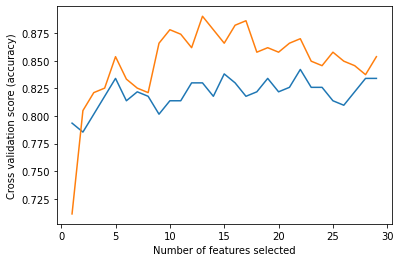

In [27]:
# what are the important features??
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Create the RFE object and compute a cross-validated score.
model_rf = RandomForestClassifier()
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=model_rf,
    step=1,
    cv=StratifiedKFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

# Part-2 : Regression

In [ ]:
# numeric target

# Part -3: Feature Extraction for Heart Disease

In [ ]:
!pip install wfdb

     |████████████████████████████████| 137 kB 5.0 MB/s 
     |████████████████████████████████| 10.3 MB 36.8 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath

import wfdb

results = {}

## Download content from Physionet

In [ ]:
# List the PhysioNet Databases

dbs = wfdb.get_dbs()
display(dbs)

[['aami-ec13', 'ANSI/AAMI EC13 Test Waveforms'],
 ['accelerometry-walk-climb-drive',
  'Labeled raw accelerometry data captured during walking, stair climbing and driving'],
 ['adfecgdb', 'Abdominal and Direct Fetal ECG Database'],
 ['afdb', 'MIT-BIH Atrial Fibrillation Database'],
 ['afpdb', 'PAF Prediction Challenge Database'],
 ['aftdb', 'AF Termination Challenge Database'],
 ['ahadb', 'AHA Database Sample Excluded Record'],
 ['antimicrobial-resistance-uti',
  'AMR-UTI: Antimicrobial Resistance in Urinary Tract Infections'],
 ['apnea-ecg', 'Apnea-ECG Database'],
 ['autonomic-aging-cardiovascular',
  'Autonomic Aging: A dataset to quantify changes of cardiovascular autonomic function during healthy aging'],
 ['bhx-brain-bounding-box',
  'Brain Hemorrhage Extended (BHX): Bounding box extrapolation from thick to thin slice CT images'],
 ['bidmc', 'BIDMC PPG and Respiration Dataset'],
 ['bigideaslab-step-hr-smartwatch',
  'BigIdeasLab_STEP: Heart rate measurements captured by smartwatch

In [ ]:
# Download all the WFDB records and annotations from a small PhysioNet Database

# Make a temporary download directory in your current working directory
cwd = os.getcwd()
dl_dir = os.path.join(cwd, 'tmp_dl_dir')

# Download all the WFDB content
wfdb.dl_database('mitdb', dl_dir=dl_dir)

# Display the downloaded content in the folder
display(os.listdir(dl_dir))

# Cleanup: delete the downloaded directory
# shutil.rmtree(dl_dir)

Generating record list for: 100
Generating record list for: 101
Generating record list for: 102
Generating record list for: 103
Generating record list for: 104
Generating record list for: 105
Generating record list for: 106
Generating record list for: 107
Generating record list for: 108
Generating record list for: 109
Generating record list for: 111
Generating record list for: 112
Generating record list for: 113
Generating record list for: 114
Generating record list for: 115
Generating record list for: 116
Generating record list for: 117
Generating record list for: 118
Generating record list for: 119
Generating record list for: 121
Generating record list for: 122
Generating record list for: 123
Generating record list for: 124
Generating record list for: 200
Generating record list for: 201
Generating record list for: 202
Generating record list for: 203
Generating record list for: 205
Generating record list for: 207
Generating record list for: 208
Generating record list for: 209
Generati

['104.hea',
 '107.atr',
 '201.dat',
 '233.dat',
 '201.atr',
 '108.hea',
 '114.hea',
 '233.atr',
 '207.hea',
 '234.atr',
 '214.atr',
 '212.hea',
 '217.dat',
 '122.hea',
 '219.dat',
 '122.dat',
 '220.atr',
 '214.hea',
 '210.dat',
 '209.atr',
 '100.hea',
 '222.hea',
 '212.atr',
 '234.hea',
 '232.dat',
 '117.atr',
 '214.dat',
 '121.atr',
 '104.dat',
 '203.dat',
 '215.dat',
 '124.dat',
 '116.dat',
 '208.atr',
 '111.hea',
 '109.atr',
 '105.atr',
 '202.hea',
 '118.atr',
 '228.atr',
 '223.hea',
 '108.dat',
 '217.atr',
 '112.hea',
 '212.dat',
 '221.dat',
 '209.dat',
 '203.atr',
 '220.dat',
 '201.hea',
 '106.dat',
 '109.dat',
 '232.hea',
 '116.atr',
 '103.dat',
 '217.hea',
 '103.atr',
 '208.hea',
 '113.dat',
 '202.atr',
 '112.atr',
 '213.hea',
 '118.hea',
 '219.hea',
 '102.atr',
 '205.dat',
 '115.hea',
 '221.atr',
 '121.hea',
 '123.atr',
 '112.dat',
 '109.hea',
 '102.hea',
 '119.dat',
 '103.hea',
 '223.dat',
 '114.dat',
 '203.hea',
 '115.atr',
 '231.atr',
 '111.dat',
 '221.hea',
 '101.atr',
 '11

## Pre-processing and peak detection

In [ ]:
!pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 95 kB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotlib-3.4.3:
      Successfully uninstalled matplotlib-3.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
wfdb 3.4.1 requires matplotlib>=3.3.4, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


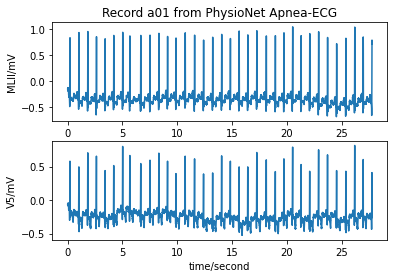

{'adc_gain': [200.0, 200.0],
 'adc_res': [11, 11],
 'adc_zero': [1024, 1024],
 'base_counter': None,
 'base_date': None,
 'base_time': None,
 'baseline': [1024, 1024],
 'block_size': [0, 0],
 'byte_offset': [None, None],
 'checksum': [8548, 60086],
 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal'],
 'counter_freq': None,
 'd_signal': None,
 'e_d_signal': None,
 'e_p_signal': None,
 'file_name': ['100.dat', '100.dat'],
 'fmt': ['212', '212'],
 'fs': 360,
 'init_value': [995, 1011],
 'n_sig': 2,
 'p_signal': array([[-0.145, -0.065],
        [-0.145, -0.065],
        [-0.145, -0.065],
        ...,
        [ 0.71 ,  0.32 ],
        [ 0.795,  0.045],
        [ 0.72 , -0.26 ]]),
 'record_name': '100',
 'samps_per_frame': [1, 1],
 'sig_len': 10000,
 'sig_name': ['MLII', 'V5'],
 'skew': [None, None],
 'units': ['mV', 'mV']}

In [ ]:
import wfdb
from wfdb import processing
import matplotlib.pyplot as plt
import matplotlib
# Load the WFDB record 10 sec segment and the physical samples
record = wfdb.rdrecord('tmp_dl_dir/100', sampfrom=0, sampto=10000)

wfdb.plot_wfdb(record=record, time_units='seconds', title='Record a01 from PhysioNet Apnea-ECG') 
display(record.__dict__)


In [ ]:
!pip install neurokit2

     |████████████████████████████████| 1.0 MB 5.0 MB/s eta 0:00:01


In [ ]:
# Load NeuroKit and other useful packages
import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 5]  # Bigger images

In [ ]:
# Extract R-peaks locations
ecg_signal = record.p_signal[:,0]
_, rpeaks = nk.ecg_peaks(ecg_signal, sampling_rate=360)

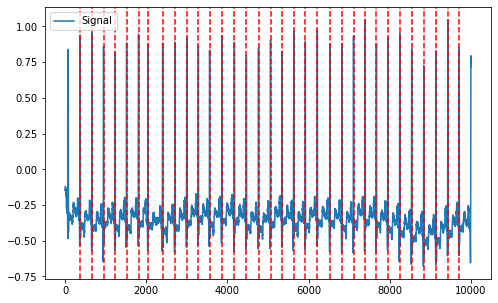

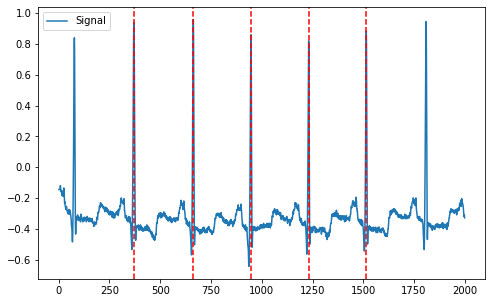

In [ ]:
# Visualize R-peaks in ECG signal
plot = nk.events_plot(rpeaks['ECG_R_Peaks'], ecg_signal)

# Zooming into the first 5 R-peaks
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][:5], ecg_signal[:2000])

In [ ]:
# Delineate the ECG signal
_, waves_peak = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=360, method="peak")

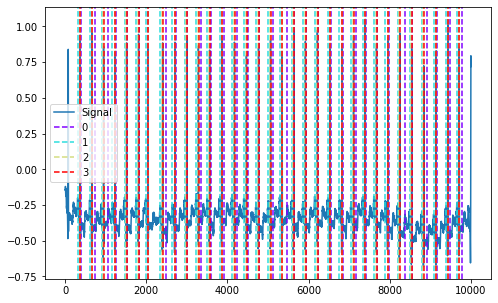

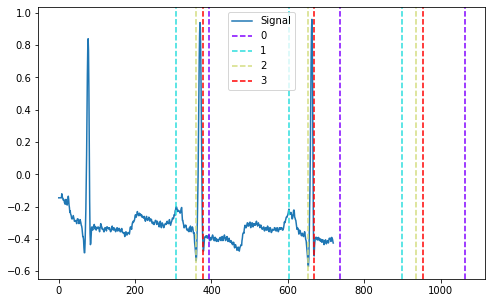

In [ ]:
# Visualize the T-peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'],
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], ecg_signal)

# Zooming into the first 3 R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:3],
                       waves_peak['ECG_P_Peaks'][:3],
                       waves_peak['ECG_Q_Peaks'][:3],
                       waves_peak['ECG_S_Peaks'][:3]], ecg_signal[:720])


In [ ]:
>>> import neurokit2 as nk
>>>
>>> # Example 1: Download the data for event-related analysis
>>> data = nk.data("bio_eventrelated_100hz")
>>>
>>> # Process the data for event-related analysis
>>> df, info = nk.bio_process(ecg=data["ECG"], sampling_rate=100)
>>> events = nk.events_find(data["Photosensor"], threshold_keep='below',
...                         event_conditions=["Negative", "Neutral",
...                                           "Neutral", "Negative"])
>>> epochs = nk.epochs_create(df, events, sampling_rate=100, epochs_start=-0.1, epochs_end=1.9)
>>>
>>> # Analyze
>>> analyze_epochs = nk.ecg_analyze(epochs, sampling_rate=100)
>>> analyze_epochs 

,Label,Condition,Event_Onset,ECG_Rate_Baseline,ECG_Rate_Max,ECG_Rate_Min,ECG_Rate_Mean,ECG_Rate_SD,ECG_Rate_Max_Time,ECG_Rate_Min_Time,ECG_Rate_Trend_Quadratic,ECG_Rate_Trend_Linear,ECG_Rate_Trend_R2,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular,ECG_Quality_Mean
1,1,Negative,1024,58.962843,-0.034935,-3.875928,-2.279443,1.114000,0.010553,1.900000,0.440750,-2.861522,0.000705,0.0,0.144578,1.0,0.400000,0.821619
2,2,Neutral,4957,64.000846,-0.056683,-5.177317,-3.690421,1.654065,0.010553,1.327136,2.079010,-6.800245,0.011156,0.0,0.814815,0.0,0.553846,0.907924
3,3,Neutral,9224,55.976284,4.674856,-1.922230,-0.282846,1.813644,1.900000,1.075879,5.152819,-7.826192,0.079506,0.0,0.044944,1.0,0.129032,0.825420
4,4,Negative,12984,57.505912,-0.010599,-3.800491,-1.378359,1.002110,0.010553,1.900000,-0.799331,-0.248683,0.009812,0.0,0.890244,0.0,0.575342,0.802749


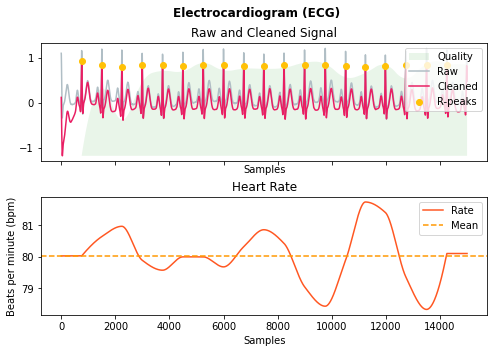

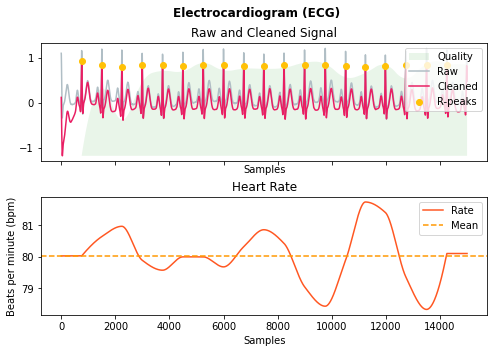

In [ ]:
>>> import neurokit2 as nk
>>>
>>> ecg = nk.ecg_simulate(duration=15, sampling_rate=1000, heart_rate=80)
>>> signals, info = nk.ecg_process(ecg, sampling_rate=1000)
>>> nk.ecg_plot(signals) 
